# WEEK 3

# LASSO REGRESSION ON GAPMINDER

## IMPORTING LIBRARIES

In [23]:
import numpy as np
import pandas as pd
import sklearn.metrics as sk
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LassoLarsCV
import matplotlib.pyplot as plt

## IMPORTING DATASETS

In [4]:
data = pd.read_csv("gapminder.csv")

data1 = data.iloc[:,[0,1,2,9,14]].copy()

data1.head()

data1.columns = ["country","income","alcohol","life","employment"]

## Data Management

In [5]:
data1  = data1.iloc[:,1:]

def fun1(a):
    
    for i in range(len(a)):
        if a[i]==" ":
            a[i] = np.nan
        else :
            a[i] = float(a[i])
            
            
    x = np.mean(a.dropna())
    
    for i in range(len(a)):
        if np.isnan(a[i]):
            a[i] = x
            

for i in data1.columns :
    fun1(data1[i])

data1.head()

## Removing Outliers 

data2 = data1.copy()

def fun2(a):
    mean = np.mean(a)
    std = np.std(a)
    
    mx = mean+3*std
    mn = mean-3*std
    
    for i in range(len(a)):
        
        if (a[i]>mx)|(a[i]<mn):
            a[i]=np.nan
            
    
    

for i in data2.columns:
    fun2(data2[i])

l1 =  len(data2)

data2 = data2.dropna()

l1 - len(data2)

5

5 rows removed as Outliers 

## PREPROCESSING

In [6]:
from sklearn import preprocessing

In [7]:
data2["income"] = preprocessing.scale(data2["income"].astype("float64"))

In [8]:
data2["alcohol"] = preprocessing.scale(data2["alcohol"].astype("float64"))

In [9]:
data2["employment"] = preprocessing.scale(data2["employment"].astype("float64"))

## MODELING

In [10]:
data2.head()

,income,alcohol,life,employment
0,0.131357,-1.465189,48.673,-0.314079
1,-0.589645,0.158481,76.918,-0.759866
2,-0.556162,-1.317583,73.131,-0.853170
3,1.525876,0.802581,69.7535,-0.009705
4,-0.646049,-0.226190,51.093,1.759346


In [11]:
x = data2.iloc[:,[0,1,3]]

In [12]:
y = data2["life"]

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y)

In [14]:
model=LassoLarsCV(cv=10, precompute=False).fit(x_train,y_train)

In [27]:
model.coef_


array([ 4.97292961,  1.41362286, -3.13043029])

## PLOTTING

C:\Users\Aryan\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
C:\Users\Aryan\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys


Text(0.5, 1.0, 'Mean squared error on each fold')

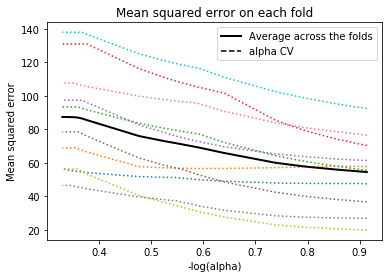

In [26]:
# plot mean square error for each fold
m_log_alphascv = -np.log10(model.cv_alphas_)
plt.figure()
plt.plot(m_log_alphascv, model.mse_path_, ':')
plt.plot(m_log_alphascv, model.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha CV')
plt.legend()
plt.xlabel('-log(alpha)')
plt.ylabel('Mean squared error')
plt.title('Mean squared error on each fold')